In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

In [236]:
def eulerSIS(t):
    
    beta, gamma = (3,2)
    I0, S0 = (0.01,0.99)
    
    dt = t
    # lists to store SIR values & initial conditions
    sList = []
    sList.append(S0)
    iList = []
    iList.append(I0)

    # list to store time
    time = np.arange(0, 25, dt).tolist()
    
    for i in range(0,len(time)-1):
        S = sList[-1] + (((-beta * sList[-1] * iList[-1])) + gamma * iList[-1]) * dt 
        I = iList[-1] + (((beta * sList[-1] * iList[-1])) - gamma * iList[-1]) * dt 
        sList.append(S)
        iList.append(I)
        
    return((time,sList,iList,rList))
        

In [237]:
def analyticalSol(t):
    r0 = 3/2
    return (1-(1/r0))/(1+ (((1-(1/r0)-0.01)/0.01)*(math.e**(-t))))

In [238]:
def plot(time, sList, iList, rList):
    t = np.linspace(0, 25, 1000)
    y = analyticalSol(t) 
    fig, ax = plt.subplots(nrows=1,ncols=1)
    ax.plot(time,iList,label='Forward Euler',color="red")
    plt.plot(t, y, label='Analytical Solution', color = "black", linestyle="dashed")
    ax.legend(loc='center right')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    ax.set_ylim(top = 0.5)
    ax.set_xlabel('time')
    ax.set_ylabel('population')
    ax.set_title('SIS Plot')

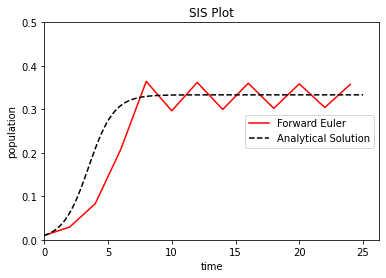

In [239]:
time, sList, iList, rList = eulerSIS(2)
plot(time,sList,iList,rList)

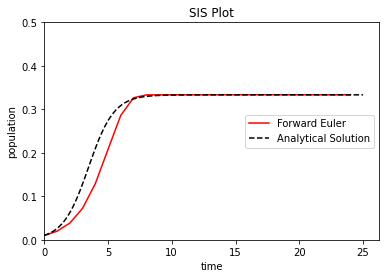

In [240]:
time, sList, iList, rList = eulerSIS(1)
plot(time,sList,iList,rList)

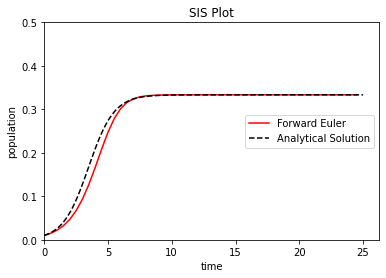

In [241]:
time, sList, iList, rList = eulerSIS(0.5)
plot(time,sList,iList,rList)

In [242]:
def computeError(t): 
    beta, gamma = (3,2)
    I0, S0 = (0.01,0.99)
    
    dt = t
    # lists to store SIR values & initial conditions
    sList = []
    sList.append(S0)
    iList = []
    iList.append(I0)

    # list to store time
    time = np.arange(0, 25, dt).tolist()
    max = 0
    
    for i in range(0,len(time)-1):
        S = sList[-1] + (((-beta * sList[-1] * iList[-1])) + gamma * iList[-1]) * dt 
        I = iList[-1] + (((beta * sList[-1] * iList[-1])) - gamma * iList[-1]) * dt 
        sList.append(S)
        iList.append(I)
        analyticalI = analyticalSol(i)
        error = I - analyticalI
        if(error > max):
            max = error
    return max
    

Text(0, 0.5, '$log(E(\\Delta t))$')

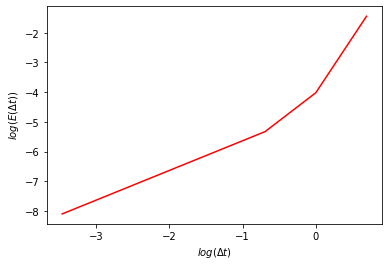

In [315]:
dt = [2,1,1/2,1/4,1/8,1/16,1/32]
dtlog = []
e = []
for t in dt:
    e.append(math.log(computeError(t)))
    if(t == 1): dtlog.append(0)
    else: dtlog.append(math.log(t))
    
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(dtlog,e,color="red")
ax.set_xlabel(r"$log(\Delta t)$")
ax.set_ylabel(r"$log(E(\Delta t))$")

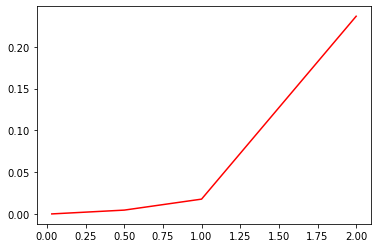

In [316]:
dt = [2,1,1/2,1/4,1/8,1/16,1/32]
e = []
for t in dt:
    e.append(computeError(t))

dtlog
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(dt,e,color="red")